In [193]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Specify the path for the data file:
df1 = pd.read_csv('GermanCreditRiskData.csv')
df1.head(10)


,checkingstatus,duration,history,purpose,amount,savings,employ,installment,status,others,...,property,age,otherplans,housing,cards,job,liable,tele,foreign,CreditRisk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,0
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,...,A122,53,A143,A152,1,A173,1,A191,A201,0
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,...,A123,35,A143,A151,1,A174,1,A192,A201,0
8,A14,12,A32,A43,3059,A64,A74,2,A91,A101,...,A121,61,A143,A152,1,A172,1,A191,A201,0
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,...,A123,28,A143,A152,2,A174,1,A191,A201,1


In [194]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

ohe=OneHotEncoder(sparse=False)
scaler = MinMaxScaler()
ct=make_column_transformer((ohe,['checkingstatus','history','purpose','savings','employ','status','others','property','otherplans','housing','job','tele','foreign']),(scaler,  ['duration','amount','installment','residence','age','cards','liable']))
data_ct=ct.fit_transform(df1)
data_ct



array([[1.        , 0.        , 0.        , ..., 0.85714286, 0.33333333,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.05357143, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.53571429, 0.        ,
        1.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.33928571, 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.07142857, 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.14285714, 0.        ,
        0.        ]])

In [195]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Separate features and labels
#X, y = data_ct, data_ct[:,61]


# Split data 75%-25% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(data_ct, df1['CreditRisk'], test_size=0.3, random_state=1)
print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

# Train the Logistic Regression model

modelLogR = LogisticRegression().fit(X_train, y_train)
print ('trained',modelLogR)

Training Set: 700 rows
Test Set: 300 rows
trained LogisticRegression()


Confusion matrix for the test set:


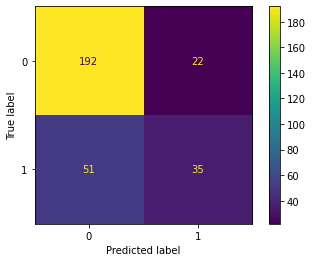

In [196]:
predictions = modelLogR.predict(X_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions, normalize=None)
print("Confusion matrix for the test set:")

disp = ConfusionMatrixDisplay(confusion_matrix=cm) 
disp.plot()

This confusion matrix shows that not a lot of people are getting rejected that should.  there are double the number of mistakes then there are correct rejections of the loan.

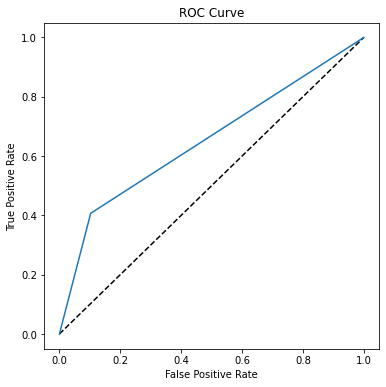

Accuracy:  0.7566666666666667
Overall Precision: 0.6140350877192983
Overall Recall: 0.4069767441860465
AUC: 0.6520865029341448


In [197]:
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
import matplotlib
%matplotlib inline

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


print('Accuracy: ', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))

auc = roc_auc_score(y_test,predictions)
print('AUC: ' + str(auc))


The model did pretty ba.  It is better than random chance but not by a lot. AUC and Recall are very low. 

In [209]:
df_label_1 = df1[df1.iloc[:, 20] == 0]
print (df_label_1.shape)
df_label_2 = df1[df1.iloc[:, 20] == 1]
print (df_label_2.shape)
df2 = df_label_1.append([df_label_2] * 5, ignore_index=True)
#frames=[df_label_1,(df_label_2*5)]
#df2 = pd.concat(frames)
print (df2.shape)

ohe=OneHotEncoder(sparse=False)
scaler = MinMaxScaler()
ct2=make_column_transformer((ohe,['checkingstatus','history','purpose','savings','employ','status','others','property','otherplans','housing','job','tele','foreign']),(scaler,  ['duration','amount','installment','residence','age','cards','liable']))
data_ct=ct2.fit_transform(df2)
data_ct


(700, 21)
(300, 21)
(2200, 21)


array([[1.        , 0.        , 0.        , ..., 0.85714286, 0.33333333,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.53571429, 0.        ,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.46428571, 0.        ,
        1.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.25      , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.125     , 0.        ,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.07142857, 0.        ,
        0.        ]])

In [210]:
# Separate features and labels

X_train, X_test, y_train, y_test = train_test_split(data_ct, df2['CreditRisk'], test_size=0.3, random_state=1)
print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

# Train the Logistic Regression model

modelLogR = LogisticRegression().fit(X_train, y_train)
print ('trained',modelLogR)


Training Set: 1540 rows
Test Set: 660 rows
trained LogisticRegression()


Confusion matrix for the weighted test set:


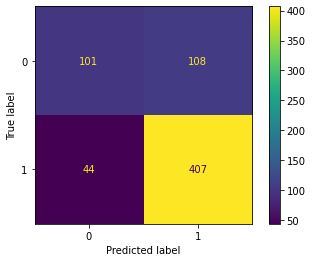

In [211]:
predictions = modelLogR.predict(X_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions, normalize=None)
print("Confusion matrix for the weighted test set:")

disp = ConfusionMatrixDisplay(confusion_matrix=cm) 
disp.plot()

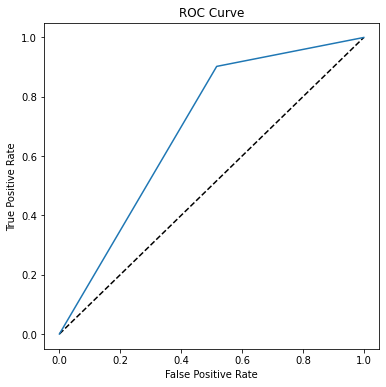

Thresholds: [2 1 0]
Accuracy:  0.7696969696969697
Overall Precision: 0.7902912621359224
Overall Recall: 0.9024390243902439
AUC: 0.6928463064534951


In [216]:
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
import matplotlib
%matplotlib inline

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print('Thresholds:',thresholds)
print('Accuracy: ', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))

auc = roc_auc_score(y_test,predictions)
print('AUC: ' + str(auc))


We can see a big improvement of the ROC curve in the weighted model. all the other metrics are bettter too.  Especially recall. Overall you can see a much large proportion of applicants are being rejected while.   The weighted model greattly favors rejecting loans to approving them and reduces the fals positive rate greatly.